<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/main/Belambus_Selatan_LIM_RLIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [6]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.3773632049560547

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 7
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,461
BRK,163
SAP,134
SAPX,46
SAPB,31
LIMX,12
LIMB,8



Unique Material count: 25
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
ESAP,85
RLIM,80
Sap,49
BR,44
SAP,40
SPT,36
HGT,35



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [7]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(10))

Masukkan GEN_LYR yang ingin difilter: LIM
Masukkan Material yang ingin difilter: RLIM

Filtered rows: 73


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
0,CS8170210,BATU BERANI,Belambus_Selatan,0.0,1.00,1.00,1.00,5.293,24.863,3.977,RLIM,None,LIM,LIM,1.810413,1.360289
1,CS8170210,BATU BERANI,Belambus_Selatan,1.0,1.20,0.20,1.00,1.516,19.855,1.215,RLIM,None,LIM,LIM,2.592656,2.077887
18,CS8170214,BATU BERANI,Belambus_Selatan,0.0,0.40,0.40,1.00,2.934,13.156,2.548,RLIM,None,LIM,LIM,2.508856,2.178789
38,CS8170215,BATU BERANI,Belambus_Selatan,0.0,1.00,1.00,1.00,4.618,28.476,3.303,RLIM,None,LIM,LIM,1.579536,1.129755
39,CS8170215,BATU BERANI,Belambus_Selatan,1.0,2.00,1.00,1.00,5.523,23.972,4.199,RLIM,None,LIM,LIM,1.889082,1.436222
40,CS8170215,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,1.00,5.136,28.505,3.672,RLIM,None,LIM,LIM,1.756713,1.255967
41,CS8170215,BATU BERANI,Belambus_Selatan,3.0,3.83,0.83,1.00,4.010,30.200,2.799,RLIM,None,LIM,LIM,1.652502,1.153455
55,CS8170217,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,0.90,5.263,24.530,3.972,RLIM,None,LIM,LIM,2.000168,1.509532
64,CS8170218,BATU BERANI,Belambus_Selatan,0.0,0.37,0.37,1.00,1.371,29.540,0.966,RLIM,None,LIM,LIM,1.267393,0.892999
66,CS8170218,BATU BERANI,Belambus_Selatan,1.0,2.00,1.00,0.94,4.455,23.400,3.413,RLIM,None,LIM,LIM,1.621163,1.241808


# Filter By Interval

Descriptive statistics for Interval:
Count: 73
Mean: 0.844658
Standard Error: 0.028708
Median: 1.0
Mode: 1.0
Standard Deviation: 0.245278
Sample Variance: 0.060161
Kurtosis: -0.026982
Skewness: -1.216293
Range: 0.8
Minimum: 0.2
Maximum: 1.0
Sum: 61.66
Confidence Level (95%): ±0.057228

Bin calculation:
Freedman–Diaconis -> bins: 6, bin width: 0.143563
Sturges -> bins: 8, bin width: 0.100000


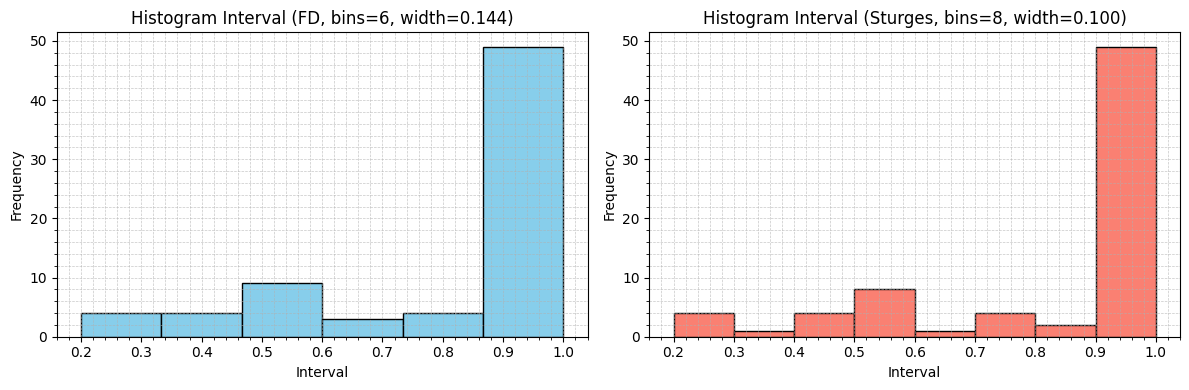


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.200000,0.333333,4
1,0.333333,0.466667,4
2,0.466667,0.600000,9
3,0.600000,0.733333,3
4,0.733333,0.866667,4
5,0.866667,1.000000,49



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.2,0.3,4
1,0.3,0.4,1
2,0.4,0.5,4
3,0.5,0.6,8
4,0.6,0.7,1
5,0.7,0.8,4
6,0.8,0.9,2
7,0.9,1.0,49


In [58]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd # Added import for pandas
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins: {bins_fd}, bin width: {h_fd:.6f}")
    print(f"Sturges -> bins: {bins_st}, bin width: {h_st:.6f}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram Interval (FD, bins={bins_fd}, width={h_fd:.3f})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={h_st:.3f})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [31]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(10))

Masukkan batas bawah (is greater than or equal to): 0.9
Masukkan batas atas (is less than or equal to): 1.0

Filtered rows: 49


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
0,CS8170210,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,5.293,24.863,3.977,RLIM,None,LIM,LIM,1.810413,1.360289
38,CS8170215,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,4.618,28.476,3.303,RLIM,None,LIM,LIM,1.579536,1.129755
39,CS8170215,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,5.523,23.972,4.199,RLIM,None,LIM,LIM,1.889082,1.436222
40,CS8170215,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,1.00,5.136,28.505,3.672,RLIM,None,LIM,LIM,1.756713,1.255967
55,CS8170217,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,0.90,5.263,24.530,3.972,RLIM,None,LIM,LIM,2.000168,1.509532
66,CS8170218,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.94,4.455,23.400,3.413,RLIM,None,LIM,LIM,1.621163,1.241808
77,CS8170220,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,6.745,11.386,5.977,RLIM,None,LIM,LIM,2.307053,2.044367
78,CS8170220,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,7.175,14.160,6.159,RLIM,None,LIM,LIM,2.454130,2.106618
102,CS8170221,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.90,5.244,9.237,4.760,RLIM,None,LIM,LIM,1.993116,1.809006
103,CS8170221,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.90,5.396,10.358,4.837,RLIM,None,LIM,LIM,2.050545,1.838143


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 49
Mean: 0.976327
Standard Error: 0.007467
Median: 1.0
Mode: 1.0
Standard Deviation: 0.052269
Sample Variance: 0.002732
Kurtosis: 5.918513
Skewness: -2.395620
Range: 0.25
Minimum: 0.75
Maximum: 1.0
Sum: 47.839999999999996
Confidence Level (95%): ±0.015013

Bin calculation:
Freedman–Diaconis -> bins=7, width=N/A
Sturges -> bins=7, width=0.035714


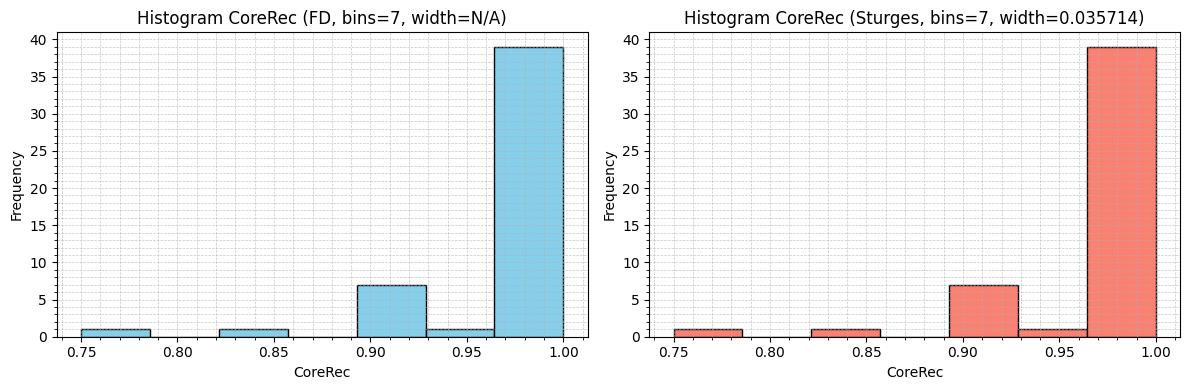


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.750000,0.785714,1
1,0.785714,0.821429,0
2,0.821429,0.857143,1
3,0.857143,0.892857,0
4,0.892857,0.928571,7
5,0.928571,0.964286,1
6,0.964286,1.000000,39



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.750000,0.785714,1
1,0.785714,0.821429,0
2,0.821429,0.857143,1
3,0.857143,0.892857,0
4,0.892857,0.928571,7
5,0.928571,0.964286,1
6,0.964286,1.000000,39


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram CoreRec (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [41]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.89
Masukkan batas atas (is less than or equal to): 1.0

Filtered rows: 47


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
0,CS8170210,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,5.293,24.863,3.977,RLIM,None,LIM,LIM,1.810413,1.360289
38,CS8170215,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,4.618,28.476,3.303,RLIM,None,LIM,LIM,1.579536,1.129755
39,CS8170215,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,5.523,23.972,4.199,RLIM,None,LIM,LIM,1.889082,1.436222
40,CS8170215,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,1.00,5.136,28.505,3.672,RLIM,None,LIM,LIM,1.756713,1.255967
55,CS8170217,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,0.90,5.263,24.530,3.972,RLIM,None,LIM,LIM,2.000168,1.509532
66,CS8170218,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.94,4.455,23.400,3.413,RLIM,None,LIM,LIM,1.621163,1.241808
77,CS8170220,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,6.745,11.386,5.977,RLIM,None,LIM,LIM,2.307053,2.044367
78,CS8170220,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,7.175,14.160,6.159,RLIM,None,LIM,LIM,2.454130,2.106618
102,CS8170221,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.90,5.244,9.237,4.760,RLIM,None,LIM,LIM,1.993116,1.809006
103,CS8170221,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.90,5.396,10.358,4.837,RLIM,None,LIM,LIM,2.050545,1.838143


# Filter By Wet Weight


IQR dihitung dari subset (Interval=1.0 & CoreRec=1.0):
Q1: 4.912, Q3: 6.696, IQR: 1.783
Lower bound: 2.238, Upper bound: 9.370


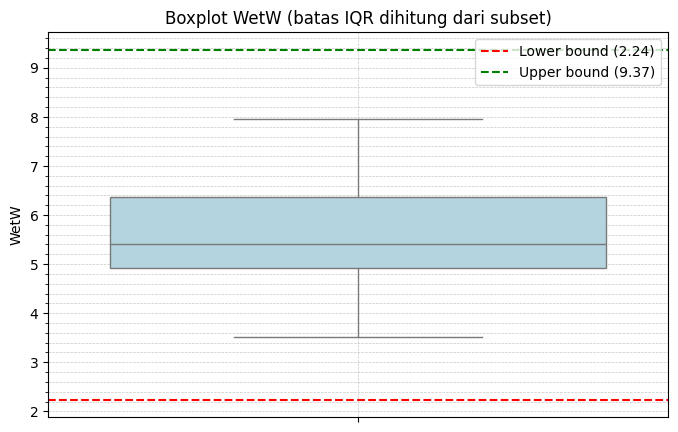

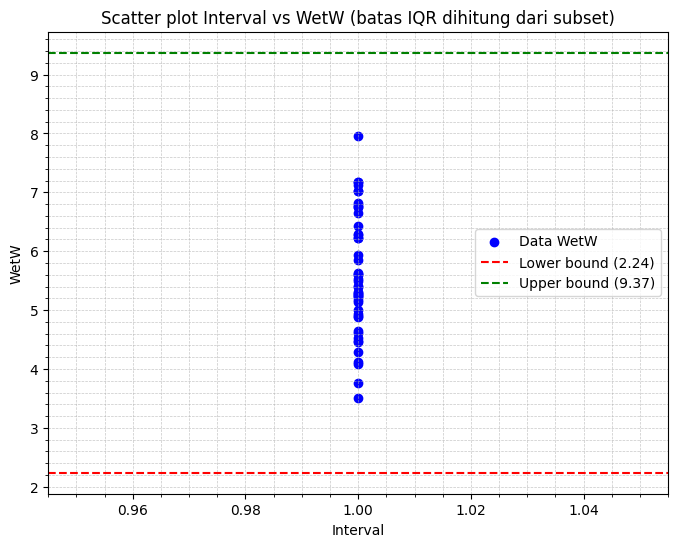


Outlier WetW berdasarkan IQR subset:
Empty DataFrame
Columns: [HoleId, Hill, Hill_Group, From, To, Interval, CoreRec, WetW, H2O, DryW, Material, Layer, NEW_LYR, GEN_LYR, WTF, DTF, Normalized_WetW]
Index: []


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

def detect_outliers_wetw_subset(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        return None

    data_subset = subset['WetW'].dropna().values

    # --- Hitung IQR dari subset ---
    q1, q3 = np.percentile(data_subset, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"\nIQR dihitung dari subset (Interval={interval_value} & CoreRec={coreRec_value}):")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower bound: {lower_bound:.3f}, Upper bound: {upper_bound:.3f}")

    # --- Boxplot seluruh data WetW ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df_recovery['WetW'], color='lightblue')
    plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.2f})')
    plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot WetW (batas IQR dihitung dari subset)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data Interval vs WetW ---
    plt.figure(figsize=(8,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')

    # Outlier berdasarkan batas subset
    outliers = df_recovery[(df_recovery['WetW'] < lower_bound) | (df_recovery['WetW'] > upper_bound)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.2f})')
    plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.2f})')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas IQR dihitung dari subset)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return outliers

# --- Contoh pemanggilan ---
outliers_wetw_subset = detect_outliers_wetw_subset(df_recovery, interval_value=1.00, coreRec_value=1.00)
print("\nOutlier WetW berdasarkan IQR subset:")
print(outliers_wetw_subset.head())

## Normalisasi Weight terhadap recovery

In [44]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-2539338653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
0,CS8170210,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,5.293,24.863,3.977,RLIM,None,LIM,LIM,1.810413,1.360289,5.293000
38,CS8170215,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,4.618,28.476,3.303,RLIM,None,LIM,LIM,1.579536,1.129755,4.618000
39,CS8170215,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,5.523,23.972,4.199,RLIM,None,LIM,LIM,1.889082,1.436222,5.523000
40,CS8170215,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,1.00,5.136,28.505,3.672,RLIM,None,LIM,LIM,1.756713,1.255967,5.136000
55,CS8170217,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,0.90,5.263,24.530,3.972,RLIM,None,LIM,LIM,2.000168,1.509532,5.847778
66,CS8170218,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.94,4.455,23.400,3.413,RLIM,None,LIM,LIM,1.621163,1.241808,4.739362
77,CS8170220,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,6.745,11.386,5.977,RLIM,None,LIM,LIM,2.307053,2.044367,6.745000
78,CS8170220,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,7.175,14.160,6.159,RLIM,None,LIM,LIM,2.454130,2.106618,7.175000
102,CS8170221,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.90,5.244,9.237,4.760,RLIM,None,LIM,LIM,1.993116,1.809006,5.826667
103,CS8170221,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.90,5.396,10.358,4.837,RLIM,None,LIM,LIM,2.050545,1.838143,5.995556



IQR dihitung dari subset (Interval=1.0 & CoreRec=1.0):
Q1: 4.912, Q3: 6.696, IQR: 1.783
Lower bound: 2.238, Upper bound: 9.370


/tmp/ipython-input-2497336606.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = df_recovery['Normalized_WetW'].apply(classify_outlier)


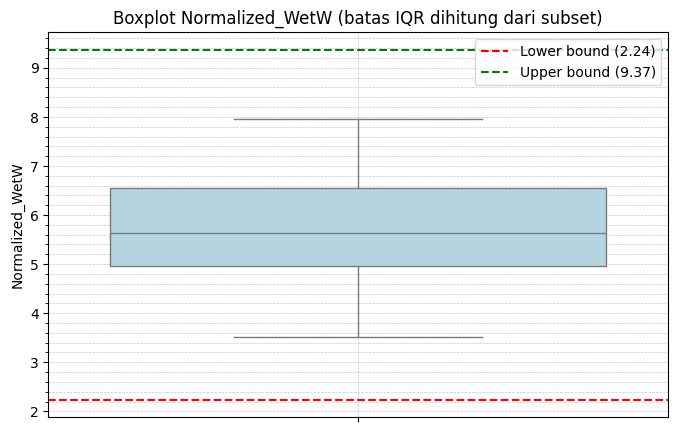

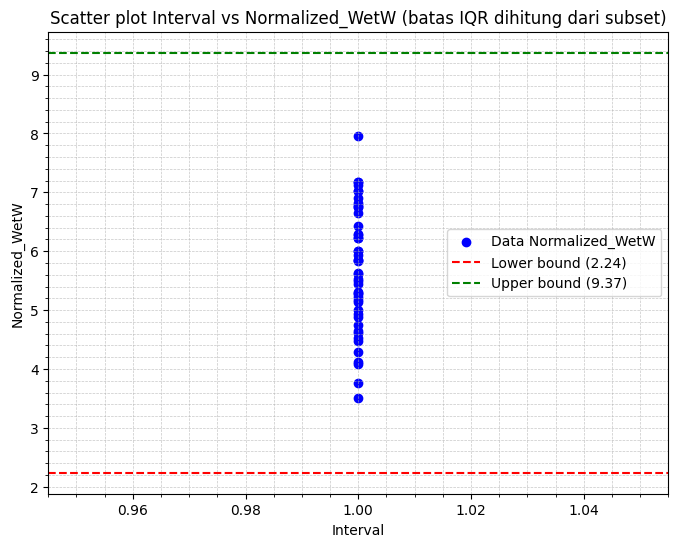

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Outlier_Status
0,CS8170210,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,5.293,24.863,3.977,RLIM,None,LIM,LIM,1.810413,1.360289,5.293000,Normal
38,CS8170215,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,4.618,28.476,3.303,RLIM,None,LIM,LIM,1.579536,1.129755,4.618000,Normal
39,CS8170215,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,5.523,23.972,4.199,RLIM,None,LIM,LIM,1.889082,1.436222,5.523000,Normal
40,CS8170215,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,1.00,5.136,28.505,3.672,RLIM,None,LIM,LIM,1.756713,1.255967,5.136000,Normal
55,CS8170217,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,0.90,5.263,24.530,3.972,RLIM,None,LIM,LIM,2.000168,1.509532,5.847778,Normal
66,CS8170218,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.94,4.455,23.400,3.413,RLIM,None,LIM,LIM,1.621163,1.241808,4.739362,Normal
77,CS8170220,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,6.745,11.386,5.977,RLIM,None,LIM,LIM,2.307053,2.044367,6.745000,Normal
78,CS8170220,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,7.175,14.160,6.159,RLIM,None,LIM,LIM,2.454130,2.106618,7.175000,Normal
102,CS8170221,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.90,5.244,9.237,4.760,RLIM,None,LIM,LIM,1.993116,1.809006,5.826667,Normal
103,CS8170221,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.90,5.396,10.358,4.837,RLIM,None,LIM,LIM,2.050545,1.838143,5.995556,Normal


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

def detect_outliers_normalized_wetw_subset(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        return None

    data_subset = subset['Normalized_WetW'].dropna().values

    # --- Hitung IQR dari subset ---
    q1, q3 = np.percentile(data_subset, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"\nIQR dihitung dari subset (Interval={interval_value} & CoreRec={coreRec_value}):")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower bound: {lower_bound:.3f}, Upper bound: {upper_bound:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val):
        if val < lower_bound:
            return "Outlier bawah"
        elif val > upper_bound:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Outlier_Status'] = df_recovery['Normalized_WetW'].apply(classify_outlier)

    # --- Boxplot seluruh data Normalized_WetW ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df_recovery['Normalized_WetW'], color='lightblue')
    plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.2f})')
    plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot Normalized_WetW (batas IQR dihitung dari subset)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data Interval vs Normalized_WetW ---
    plt.figure(figsize=(8,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.2f})')
    plt.axhline(upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.2f})')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas IQR dihitung dari subset)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_subset(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=6, width=0.803308
Sturges -> bins=7, width=0.634714


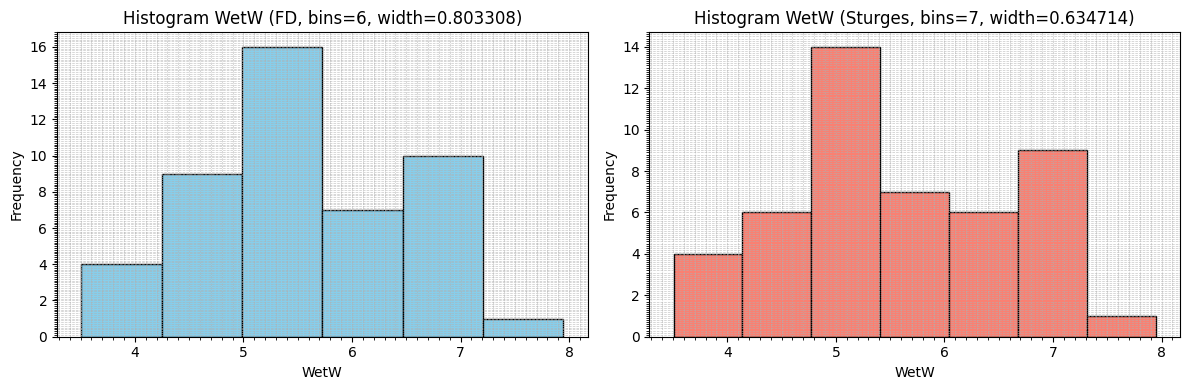


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,3.5050,4.2455,4
1,4.2455,4.9860,9
2,4.9860,5.7265,16
3,5.7265,6.4670,7
4,6.4670,7.2075,10
5,7.2075,7.9480,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,3.505000,4.139714,4
1,4.139714,4.774429,6
2,4.774429,5.409143,14
3,5.409143,6.043857,7
4,6.043857,6.678571,6
5,6.678571,7.313286,9
6,7.313286,7.948000,1


In [56]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [71]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter df_recovery, hasilnya disimpan ke df_wetw
df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                      (df_recovery['WetW'] <= upper_bound)].copy()

# Tambahkan kolom Outlier_Status = "Normal"
df_wetw['Outlier_Status'] = "Normal"

# Drop kolom Outlier_Status setelah ditambahkan
df_wetw = df_wetw.drop(columns=['Outlier_Status'])

print(f"\nFiltered rows: {len(df_wetw)}")
display(df_wetw.head(10))

Masukkan batas bawah (is greater than or equal to): 4.2455
Masukkan batas atas (is less than or equal to): 7.2075

Filtered rows: 42


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
0,CS8170210,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,5.293,24.863,3.977,RLIM,None,LIM,LIM,1.810413,1.360289,5.293000
38,CS8170215,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,4.618,28.476,3.303,RLIM,None,LIM,LIM,1.579536,1.129755,4.618000
39,CS8170215,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,5.523,23.972,4.199,RLIM,None,LIM,LIM,1.889082,1.436222,5.523000
40,CS8170215,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,1.00,5.136,28.505,3.672,RLIM,None,LIM,LIM,1.756713,1.255967,5.136000
55,CS8170217,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,0.90,5.263,24.530,3.972,RLIM,None,LIM,LIM,2.000168,1.509532,5.847778
66,CS8170218,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.94,4.455,23.400,3.413,RLIM,None,LIM,LIM,1.621163,1.241808,4.739362
77,CS8170220,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,6.745,11.386,5.977,RLIM,None,LIM,LIM,2.307053,2.044367,6.745000
78,CS8170220,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,7.175,14.160,6.159,RLIM,None,LIM,LIM,2.454130,2.106618,7.175000
102,CS8170221,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.90,5.244,9.237,4.760,RLIM,None,LIM,LIM,1.993116,1.809006,5.826667
103,CS8170221,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.90,5.396,10.358,4.837,RLIM,None,LIM,LIM,2.050545,1.838143,5.995556


#Filter By MC


Descriptive statistics for H2O:
Count: 42
Mean: 19.258024
Standard Error: 0.970999
Median: 19.21
Mode: 9.237
Standard Deviation: 6.292792
Sample Variance: 39.599235
Kurtosis: -0.690218
Skewness: 0.374086
Range: 25.811999999999998
Minimum: 9.237
Maximum: 35.049
Sum: 808.837
Confidence Level (95%): ±1.960972

Bin calculation:
Freedman–Diaconis -> bins=5, width=5.847337
Sturges -> bins=7, width=3.687429


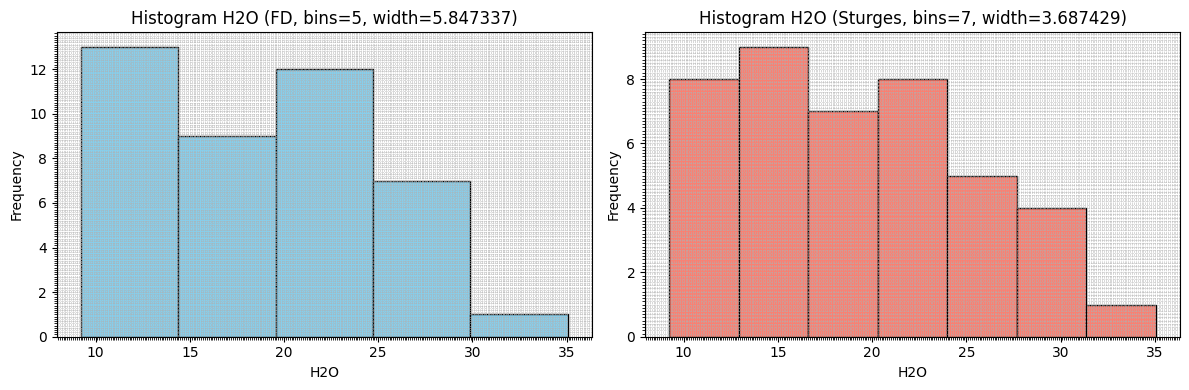


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,9.2370,14.3994,13
1,14.3994,19.5618,9
2,19.5618,24.7242,12
3,24.7242,29.8866,7
4,29.8866,35.0490,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,9.237000,12.924429,8
1,12.924429,16.611857,9
2,16.611857,20.299286,7
3,20.299286,23.986714,8
4,23.986714,27.674143,5
5,27.674143,31.361571,4
6,31.361571,35.049000,1


In [72]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [73]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 9.237000
is less than or equal to: 23.986714

Filtered rows (H2O): 32


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
39,CS8170215,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,5.523,23.972,4.199,RLIM,None,LIM,LIM,1.889082,1.436222,5.523000
66,CS8170218,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.94,4.455,23.400,3.413,RLIM,None,LIM,LIM,1.621163,1.241808,4.739362
77,CS8170220,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.00,6.745,11.386,5.977,RLIM,None,LIM,LIM,2.307053,2.044367,6.745000
78,CS8170220,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,7.175,14.160,6.159,RLIM,None,LIM,LIM,2.454130,2.106618,7.175000
102,CS8170221,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.90,5.244,9.237,4.760,RLIM,None,LIM,LIM,1.993116,1.809006,5.826667
103,CS8170221,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.90,5.396,10.358,4.837,RLIM,None,LIM,LIM,2.050545,1.838143,5.995556
104,CS8170221,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,1.00,5.856,13.234,5.081,RLIM,None,LIM,LIM,2.002981,1.737900,5.856000
107,CS8170221,BATU BERANI,Belambus_Selatan,4.0,5.0,1.0,1.00,7.181,12.491,6.284,RLIM,None,LIM,LIM,2.456182,2.149373,7.181000
127,CS8170222,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.00,6.646,22.916,5.123,RLIM,None,LIM,LIM,2.273191,1.752266,6.646000
139,CS8170226,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.90,5.599,12.443,4.902,RLIM,None,LIM,LIM,2.127821,1.863057,6.221111


# Filter By DTF


Descriptive statistics for DTF:
Count: 32
Mean: 1.658777
Standard Error: 0.050139
Median: 1.7089400554999998
Mode: 1.868243537
Standard Deviation: 0.283632
Sample Variance: 0.080447
Kurtosis: -1.261526
Skewness: -0.023158
Range: 0.9902441340000001
Minimum: 1.159129202
Maximum: 2.149373336
Sum: 53.080868432
Confidence Level (95%): ±0.102260

Bin calculation:
Freedman–Diaconis -> bins=5, width=0.301981
Sturges -> bins=6, width=0.165041


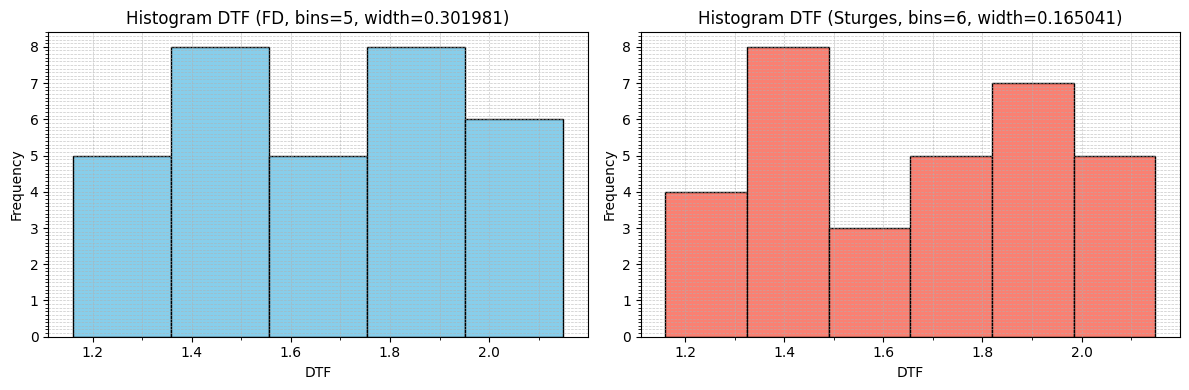


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,1.159129,1.357178,5
1,1.357178,1.555227,8
2,1.555227,1.753276,5
3,1.753276,1.951325,8
4,1.951325,2.149373,6



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,1.159129,1.324170,4
1,1.324170,1.489211,8
2,1.489211,1.654251,3
3,1.654251,1.819292,5
4,1.819292,1.984333,7
5,1.984333,2.149373,5


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [75]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(17))

is greater than or equal to: 1.489211
is less than or equal to: 	2.149373

Filtered rows (DTF): 19


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
77,CS8170220,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,1.0,6.745,11.386,5.977,RLIM,None,LIM,LIM,2.307053,2.044367,6.745000
78,CS8170220,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.0,7.175,14.160,6.159,RLIM,None,LIM,LIM,2.454130,2.106618,7.175000
102,CS8170221,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.9,5.244,9.237,4.760,RLIM,None,LIM,LIM,1.993116,1.809006,5.826667
103,CS8170221,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,0.9,5.396,10.358,4.837,RLIM,None,LIM,LIM,2.050545,1.838143,5.995556
104,CS8170221,BATU BERANI,Belambus_Selatan,2.0,3.0,1.0,1.0,5.856,13.234,5.081,RLIM,None,LIM,LIM,2.002981,1.737900,5.856000
127,CS8170222,BATU BERANI,Belambus_Selatan,1.0,2.0,1.0,1.0,6.646,22.916,5.123,RLIM,None,LIM,LIM,2.273191,1.752266,6.646000
139,CS8170226,BATU BERANI,Belambus_Selatan,0.0,1.0,1.0,0.9,5.599,12.443,4.902,RLIM,None,LIM,LIM,2.127821,1.863057,6.221111
195,CS8230802,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.0,1.0,1.0,1.0,5.630,15.009,4.785,RLIM,Lim,LIM,LIM,1.919382,1.631304,5.630000
243,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,0.0,1.0,1.0,1.0,7.125,16.421,5.955,RLIM,LIM,LIM,LIM,2.429058,2.030181,7.125000
244,CS8230808,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.0,2.0,1.0,1.0,6.435,18.959,5.215,RLIM,LIM,LIM,LIM,2.193822,1.777900,6.435000


# SUMMARY

In [76]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 19
Mean: 1.000000
Standard Error: 0.000000
Median: 1.0
Mode: 1.0
Standard Deviation: 0.000000
Sample Variance: 0.000000
Kurtosis: N/A
Skewness: N/A
Range: 0.0
Minimum: 1.0
Maximum: 1.0
Sum: 19.0
Confidence Level (95%): ±0.000000

Descriptive statistics for CoreRec:
Count: 19
Mean: 0.978947
Standard Error: 0.009609
Median: 1.0
Mode: 1.0
Standard Deviation: 0.041885
Sample Variance: 0.001754
Kurtosis: 0.016667
Skewness: -1.420094
Range: 0.09999999999999998
Minimum: 0.9
Maximum: 1.0
Sum: 18.6
Confidence Level (95%): ±0.020188

Descriptive statistics for WetW:
Count: 19
Mean: 6.197947
Standard Error: 0.151922
Median: 6.27
Mode: 5.165
Standard Deviation: 0.662211
Sample Variance: 0.438524
Kurtosis: -1.311641
Skewness: -0.088851
Range: 2.01
Minimum: 5.165
Maximum: 7.175
Sum: 117.76100000000001
Confidence Level (95%): ±0.319176

Descriptive statistics for H2O:
Count: 19
Mean: 15.119842
Standard Error: 0.811263
Median: 14.889
Mode: 9.237
Standard De

/tmp/ipython-input-1308544473.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = stats.kurtosis(data) if n > 3 else np.nan
/tmp/ipython-input-1308544473.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(data) if n > 2 else np.nan


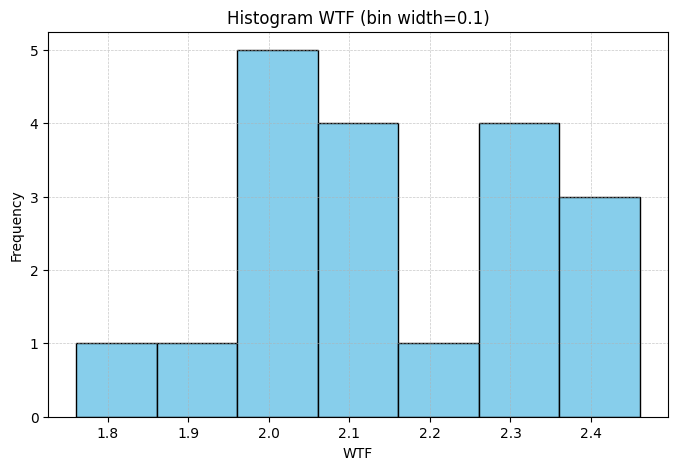


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.760854,1.860854,1
1,1.860854,1.960854,1
2,1.960854,2.060854,5
3,2.060854,2.160854,4
4,2.160854,2.260854,1
5,2.260854,2.360854,4
6,2.360854,2.460854,3


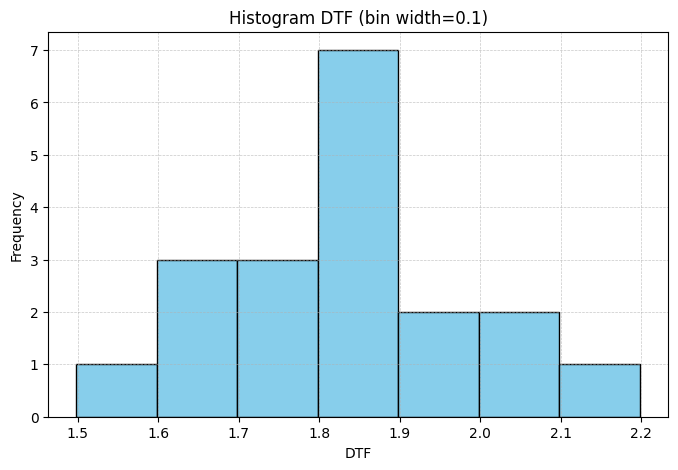


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,1.498345,1.598345,1
1,1.598345,1.698345,3
2,1.698345,1.798345,3
3,1.798345,1.898345,7
4,1.898345,1.998345,2
5,1.998345,2.098345,2
6,2.098345,2.198345,1


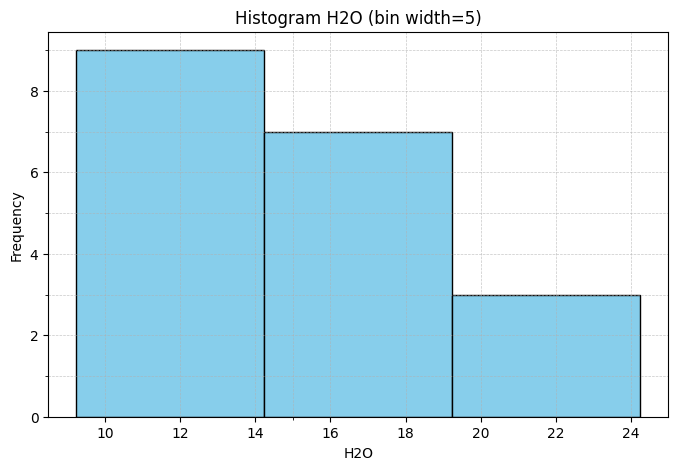


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,9.237,14.237,9
1,14.237,19.237,7
2,19.237,24.237,3


In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [78]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: LIM
Masukkan Material: RLIM

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_lim_rlim


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,LIM,RLIM,1.0,0.978947,6.197947,15.119842,5.252842,2.158774,1.830811
